<a href="https://colab.research.google.com/github/erikaaputt/Naive-Bayes-dan-KNN-/blob/main/Tugas_Datmin_Naive_Bayes_dan_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
anemia=pd.read_csv('data - anemia.csv')

In [3]:
anemia.head()

,Umur,HB,Goldar,TD,Nadi,Keterangan
0,22,10.3,AB,1.25,85,Anemia
1,26,12.5,AB,1.25,85,Non Anemia
2,21,10.6,AB,1.38,85,Anemia
3,31,10.9,B,1.50,85,Anemia
4,25,10.6,AB,1.25,85,Anemia


In [4]:
anemia.tail(5)

,Umur,HB,Goldar,TD,Nadi,Keterangan
120,34,13.2,O,1.25,85,Non Anemia
121,24,10.9,B,1.50,80,Anemia
122,21,5.9,NaN,1.38,80,Anemia
123,30,12.4,AB,1.25,85,Non Anemia
124,30,9.2,B,1.38,80,Anemia


Karena dimulai dari nol maka dataset ini memiliki total pengamatan 125

In [5]:
#melihat statistika deskriptif
anemia.describe()

,Umur,HB,TD,Nadi
count,125.00000,125.000000,125.000000,125.000000
mean,27.76800,10.375200,1.309120,82.152000
std,6.41462,1.581478,0.088619,2.324678
min,18.00000,5.700000,1.250000,80.000000
25%,22.00000,9.600000,1.250000,80.000000
50%,27.00000,10.300000,1.250000,80.000000
75%,32.00000,11.200000,1.380000,85.000000
max,49.00000,13.700000,1.500000,85.000000


In [6]:
anemia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Umur        125 non-null    int64  
 1   HB          125 non-null    float64
 2   Goldar      112 non-null    object 
 3   TD          125 non-null    float64
 4   Nadi        125 non-null    int64  
 5   Keterangan  125 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 6.0+ KB


In [7]:
anemia.isnull()

,Umur,HB,Goldar,TD,Nadi,Keterangan
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
120,False,False,False,False,False,False
121,False,False,False,False,False,False
122,False,False,True,False,False,False
123,False,False,False,False,False,False


In [8]:
np.sum(anemia.isnull())

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
Umur,0
HB,0
Goldar,13
TD,0
Nadi,0
Keterangan,0


In [9]:
#mengetahui jumlah missing value di seluruh dataset
anemia.isnull().sum().sum()

np.int64(13)

In [10]:
#melihat isi dalam kolom Goldar
anemia['Goldar'].unique()

array(['AB', 'B', 'O', 'B+', nan, 'A', 'O+', 'A+'], dtype=object)

In [11]:
#jumlah missing value
np.sum(anemia['Goldar'].isnull())

np.int64(13)

In [12]:
#mengisi missing value
anemia['Goldar']=anemia['Goldar'].fillna(anemia['Goldar'].mode()[0])

In [13]:
#jumlah missing value
np.sum(anemia['Goldar'].isnull())

np.int64(0)

In [14]:
count_values = anemia['Keterangan'].value_counts()
count_values

,count
Keterangan,
Anemia,91
Non Anemia,34


In [15]:
anemia['Keterangan'] = anemia['Keterangan'].map({'Anemia':0,'Non Anemia':1})

In [16]:
anemia['Goldar'] = anemia['Goldar'].map({'A':0,'A+':1,'AB':2,'B':3,'B+':4,'O':5})

In [17]:
# Menghitung rata-rata berdasarkan nilai 'Keterangan'
mean_by_Keterangan = anemia.groupby('Keterangan').mean()

# Menampilkan rata-rata untuk setiap variabel berdasarkan nilai 'Keterangan'
print(mean_by_Keterangan)



                 Umur         HB    Goldar        TD       Nadi
Keterangan                                                     
0           27.637363   9.629670  3.157303  1.328462  81.087912
1           28.117647  12.370588  3.058824  1.257353  85.000000


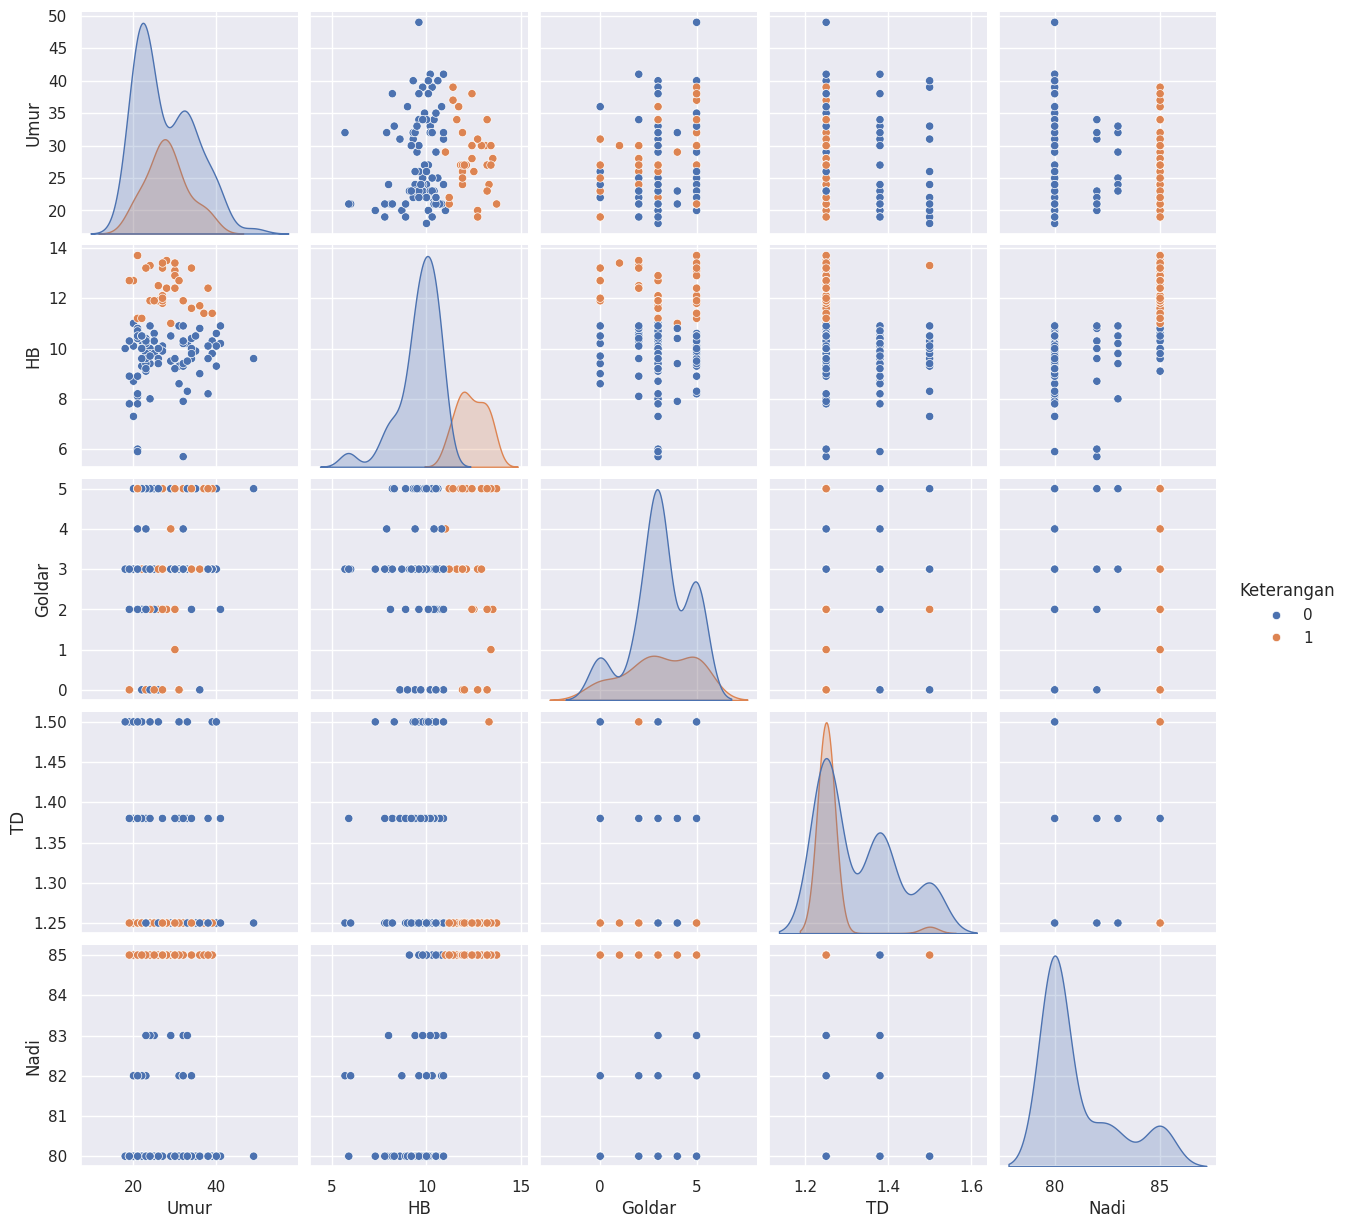

In [18]:
#visualisasi. warna dibedakan berdasarkan keterangannya apakah anemia atau tidak
sns.pairplot(anemia, vars=['Umur', 'HB', 'Goldar', 'TD', 'Nadi'], hue='Keterangan')

In [19]:
import seaborn as sns
import pandas as pd


# Menghitung korelasi antara setiap variabel dengan 'Keterangan'
correlation_with_keterangan = anemia.corr()['Keterangan'].sort_values(ascending=False)

# Menampilkan korelasi setiap variabel dengan 'Keterangan'
print(correlation_with_keterangan)

Keterangan    1.000000
HB            0.774332
Nadi          0.751865
Umur          0.033452
Goldar       -0.028492
TD           -0.358502
Name: Keterangan, dtype: float64


Korelasi Positif: Nilai korelasi mendekati 1 menunjukkan korelasi positif yang kuat. Misalnya, HB (HB) memiliki korelasi sebesar 0.774332 dengan 'Keterangan'. Ini menunjukkan bahwa ada hubungan positif yang cukup kuat antara HB dan kemungkinan seseorang memiliki anemia (Keterangan=1). Semakin tinggi HB, semakin tinggi kemungkinan seseorang memiliki anemia.

Korelasi Negatif: Nilai korelasi mendekati -1 menunjukkan korelasi negatif yang kuat. Misalnya, TD (TD) memiliki korelasi sebesar -0.358502 dengan 'Keterangan'. Ini menunjukkan bahwa ada hubungan negatif yang tidak begitu kuat antara TD dan kemungkinan seseorang memiliki anemia (Keterangan=1). Semakin tinggi TD, semakin rendah kemungkinan seseorang memiliki anemia.

In [20]:
#memisahkan data menjadi variabel x dan y
X=anemia.drop(['Keterangan'], axis=1)
y=anemia['Keterangan']

Pemisahan ini untuk:

Melatih Model: Data X digunakan untuk melatih model. Model belajar dari pola-pola yang ada di dalam data X untuk dapat memprediksi atau mengklasifikasikan data dengan tepat.

Validasi dan Evaluasi: Data y (outcome) dibutuhkan untuk menguji seberapa baik model yang sudah dilatih mampu melakukan prediksi. Dengan memisahkan target dari fitur-fitur, kita dapat mengevaluasi seberapa baik model dapat memprediksi label yang benar untuk data baru yang belum pernah dilihat sebelumnya.

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Pemisahan data training dan testing adalah keputusan yang penting dalam pembuatan model yang dapat diandalkan. Secara umum, tidak ada aturan baku tentang seberapa besar persentase data yang harus dialokasikan untuk training dan testing, namun terdapat praktik umum yang dapat dipertimbangkan:

Pemisahan Standar: Pembagian yang sering digunakan adalah 70-30 atau 80-20, di mana sekitar 70% atau 80% dari data digunakan untuk training dan sisa 30% atau 20% digunakan untuk testing. Ini bisa menjadi awal yang baik untuk banyak kasus.

Data yang Lebih Besar: Jika datasetnya besar, pemisahan seperti 90-10 atau bahkan 95-5 mungkin dapat dilakukan. Model dengan lebih banyak data training cenderung memiliki kinerja yang lebih baik, tetapi harus diingat bahwa kita ingin memiliki cukup data di testing untuk evaluasi yang akurat.

In [22]:
from sklearn.preprocessing import MinMaxScaler

X_train = MinMaxScaler().fit_transform(X_train)
X_test = MinMaxScaler().fit_transform(X_test)

print(X_train)

[[0.06666667 0.3        0.4        0.         0.        ]
 [0.26666667 0.9625     1.         0.         1.        ]
 [0.1        0.6        0.4        0.52       1.        ]
 [0.43333333 0.65       0.6        0.         0.6       ]
 [0.5        0.7375     0.6        0.         1.        ]
 [0.4        0.65       0.         0.52       0.4       ]
 [0.4        0.875      0.         0.         1.        ]
 [0.36666667 0.9        0.6        0.         1.        ]
 [0.63333333 0.55       0.6        0.52       0.        ]
 [0.36666667 0.4375     0.6        0.52       0.        ]
 [0.1        0.4875     1.         0.52       0.        ]
 [0.4        0.65       0.6        1.         1.        ]
 [0.13333333 0.575      1.         0.         0.4       ]
 [0.56666667 0.6375     0.6        0.         1.        ]
 [0.13333333 0.5625     0.         0.52       0.        ]
 [0.26666667 0.7875     0.         0.         1.        ]
 [0.1        0.6        1.         0.         0.        ]
 [0.1        0

# Naive Bayes

In [23]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [24]:
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline

# Buat pipeline: isi NaN -> fit ke model
imputer = SimpleImputer(strategy='mean')  # atau 'median', 'most_frequent', dsb
nb = GaussianNB()

pipeline = make_pipeline(imputer, nb)
pipeline.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('gaussiannb', GaussianNB())])

In [25]:
pipeline = make_pipeline(SimpleImputer(strategy='mean'), GaussianNB())
pipeline.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('gaussiannb', GaussianNB())])

In [26]:
pipeline.score(X_train, y_train)

0.9

In [27]:
classif_name = ['NB']
y_predict = {}
y_predict['NB'] = pipeline.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score
for name in classif_name:
    print('{0} accuracy = {1:.4f}'.format(name, accuracy_score(y_test, y_predict[name])))

NB accuracy = 0.9200


# KNN

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # atau 'median', dsb
    ('mlp', MLPClassifier(max_iter=1000))
])

# Param grid-nya harus sesuai dengan nama step-nya
param_grid = {
    'mlp__hidden_layer_sizes': [(50,), (100,)],
    'mlp__activation': ['relu', 'tanh'],
    'mlp__alpha': [0.0001, 0.001]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('mlp', MLPClassifier(max_iter=1000))]),
             param_grid={'mlp__activation': ['relu', 'tanh'],
                         'mlp__alpha': [0.0001, 0.001],
                         'mlp__hidden_layer_sizes': [(50,), (100,)]})

In [30]:
# Tampilkan parameter terbaik
print("Parameter terbaik:", grid_search.best_params_)

Parameter terbaik: {'mlp__activation': 'tanh', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (50,)}


In [31]:
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier

# Tangani NaN dengan mengganti pakai rata-rata
imputer = SimpleImputer(strategy='mean')
X_train_clean = imputer.fit_transform(X_train)

# Fit model
clf = MLPClassifier(hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=100)
clf.fit(X_train_clean, y_train)

MLPClassifier(hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=100)

In [32]:
imputer = SimpleImputer(strategy='mean')
X_train_clean = imputer.fit_transform(X_train)

clf = MLPClassifier(hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=100)
clf.fit(X_train_clean, y_train)

# Maka saat prediksi:
X_test_clean = imputer.transform(X_test)  # JANGAN pakai fit_transform
y_pred = clf.predict(X_test_clean)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.89      0.94         9

    accuracy                           0.96        25
   macro avg       0.97      0.94      0.96        25
weighted avg       0.96      0.96      0.96        25



Model ini tampil sangat baik di kedua kelas, tapi sedikit kurang maksimal dalam mendeteksi seluruh data kelas 1.

Akurasi tinggi (96%) dan F1-score seimbang menunjukkan model ini cukup andal dan generalisasi-nya bagus.

In [34]:
from sklearn.metrics import accuracy_score

round(accuracy_score(y_test,y_pred),5)

0.96

Output 0.96 yang dihasilkan dari accuracy_score menunjukkan tingkat akurasi dari model klasifikasi yang dilatih. Dalam konteks ini, angka 0.96 berarti bahwa model berhasil memprediksi dengan benar sekitar 96% dari semua sampel pada data uji (y_test) yang telah digunakan.

# Perbandingan Naive Bayes dan KNN

Akurasi

Naive Bayes : 0.92

KNN : 0.96

KNN sedikit unggul jika dilihat dari akurasi, berarti model tersebut lebih tepat dalam mengklasifikasikan data.